## Assignment 2

## IDs and Names below

1- Hazem Effat Mohamed 46-7679   
2- Karim Samir 46-4661

### Imports

In [523]:
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Dataset 1(gene exprsssion)

In [525]:
df = pd.read_csv('data/gene_expression.csv')

## Feature Engineerng 

In [526]:
df.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [528]:
len(df.columns)

3

### Observing NaN Features

In [529]:
df.isnull()

Gene One  Gene Two  Cancer Present
0        False     False           False
1        False     False           False
2        False     False           False
3        False     False           False
4        False     False           False
...        ...       ...             ...
2995     False     False           False
2996     False     False           False
2997     False     False           False
2998     False     False           False
2999     False     False           False

[3000 rows x 3 columns]

In [530]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [531]:
100* df.isnull().sum() / len(df)

Gene One          0.0
Gene Two          0.0
Cancer Present    0.0
dtype: float64

In [532]:
df.describe()

Gene One     Gene Two  Cancer Present
count  3000.000000  3000.000000     3000.000000
mean      5.600133     5.410467        0.500000
std       1.828388     1.729081        0.500083
min       1.000000     1.000000        0.000000
25%       4.300000     4.000000        0.000000
50%       5.600000     5.400000        0.500000
75%       6.900000     6.700000        1.000000
max      10.000000    10.000000        1.000000

In [533]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

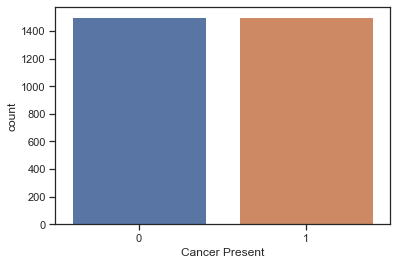

In [534]:
sns.countplot(data=df,x='Cancer Present')

<AxesSubplot:xlabel='Cancer Present', ylabel='Gene One'>

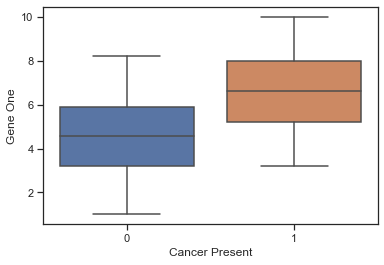

In [535]:
sns.boxplot(x='Cancer Present',y='Gene One',data=df)

<AxesSubplot:xlabel='Cancer Present', ylabel='Gene Two'>

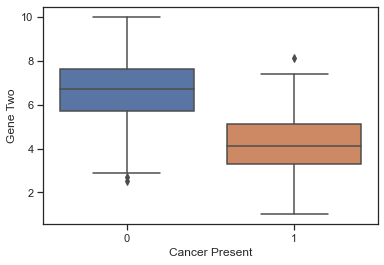

In [536]:
sns.boxplot(x='Cancer Present',y='Gene Two',data=df)

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

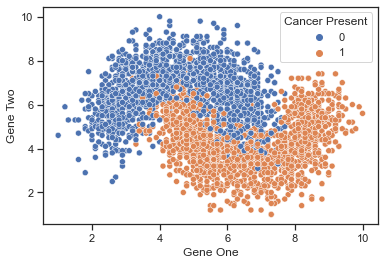

In [537]:
sns.scatterplot(x='Gene One',y='Gene Two',data=df,hue='Cancer Present')

In [538]:
sns.pairplot(df,hue='Cancer Present')

<AxesSubplot:>

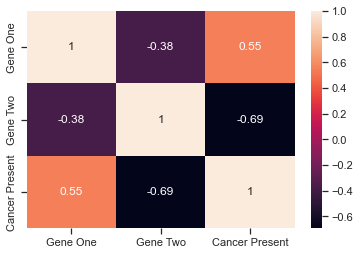

In [539]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Gene One', ylabel='Cancer Present'>

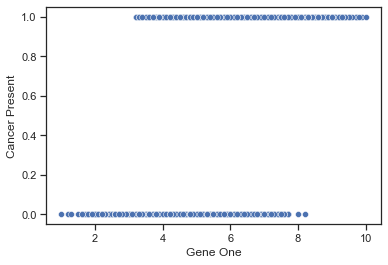

In [540]:
sns.scatterplot(x='Gene One',y='Cancer Present',data=df)

<AxesSubplot:xlabel='Gene Two', ylabel='Cancer Present'>

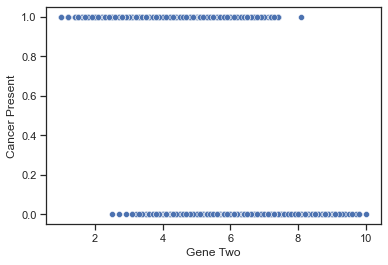

In [541]:
sns.scatterplot(x='Gene Two',y='Cancer Present',data=df)

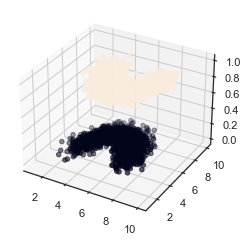

In [542]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'],df['Gene Two'],df['Cancer Present'],c=df['Cancer Present'])

### Train | Test Split and Scaling

In [543]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [544]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [546]:
scaler = StandardScaler()

In [547]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression Model

In [548]:
from sklearn.linear_model import LogisticRegression

In [549]:
log_model = LogisticRegression()

In [550]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [551]:
log_model.coef_

array([[ 1.1658307 , -2.19487079]])

### Model Performance on Classification Tasks

In [552]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [553]:
y_pred = log_model.predict(scaled_X_test)

In [554]:
accuracy_score(y_test,y_pred)

0.8566666666666667

In [555]:
confusion_matrix(y_test,y_pred)

array([[400,  70],
       [ 59, 371]], dtype=int64)

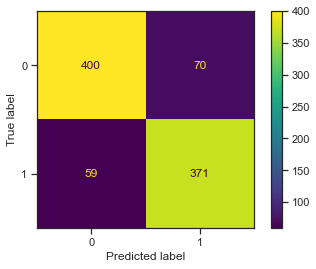

In [556]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

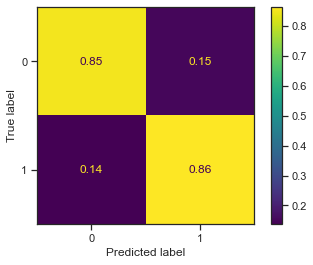

In [557]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [558]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       470
           1       0.84      0.86      0.85       430

    accuracy                           0.86       900
   macro avg       0.86      0.86      0.86       900
weighted avg       0.86      0.86      0.86       900



In [559]:
X_train.iloc[0]

0    6.4
1    6.6
Name: 611, dtype: float64

In [560]:
y_train.iloc[0]

0

In [561]:
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[9.99052945e-01, 9.47055098e-04]])

In [562]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([0], dtype=int64)

### Evaluating Curves and AUC


In [563]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

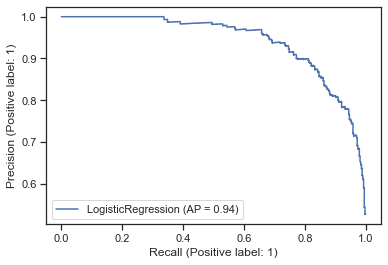

In [564]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [565]:
plot_roc_curve(log_model,scaled_X_test,y_test)

## KNN

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

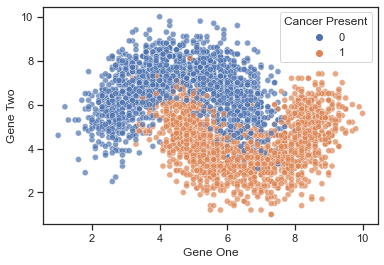

In [566]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

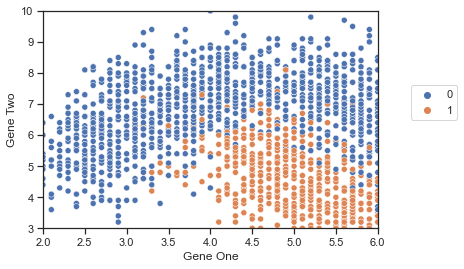

In [567]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

### Train|Test Split and Scaling Data

In [568]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [569]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [570]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [571]:
scaler = StandardScaler()

In [572]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [573]:
from sklearn.neighbors import KNeighborsClassifier

In [574]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [575]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [576]:
full_test = pd.concat([X_test,y_test],axis=1)
full_test.columns = ['Gene One', 'Gene Two', 'Cancer Present']
len(full_test)

900

In [577]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',
                data=full_test,alpha=0.7)

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

### Model Evaluation

In [578]:
y_pred = knn_model.predict(scaled_X_test)

In [579]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [580]:
accuracy_score(y_test,y_pred)

0.9011111111111111

In [581]:
confusion_matrix(y_test,y_pred)

array([[424,  46],
       [ 43, 387]], dtype=int64)

In [582]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       470
           1       0.89      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



### Using Elbow Method for Choosing Reasonable K Values

In [583]:
test_error_rates = []


for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [584]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

Text(0.5, 0, 'K Value')

Best K value is equal to 9

### Final Model

In [585]:
from sklearn.pipeline import Pipeline

In [586]:
scaler = StandardScaler()
knn9 = KNeighborsClassifier(n_neighbors=9)
operations = [('scaler',scaler),('knn9',knn9)]

In [587]:
pipe = Pipeline(operations)

In [588]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn9', KNeighborsClassifier(n_neighbors=9))])

In [589]:
pipe_pred = pipe.predict(X_test)

In [590]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [591]:
single_sample = X_test.iloc[40]

In [592]:
single_sample

0    3.8
1    6.3
Name: 194, dtype: float64

In [593]:
pipe.predict(single_sample.values.reshape(1, -1))

array([0], dtype=int64)

In [594]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

array([[1., 0.]])

## SVM

In [595]:
from sklearn.preprocessing import StandardScaler
def scale(df_train: pd.DataFrame, df_test: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    # df_train_with_nemeric = df_train.select_dtypes('number')

    # df_test_with_nemeric = df_test.select_dtypes('number')
    # cols = df_train_with_nemeric.columns
    # df_train_rest = df_train.loc[:, ~df_train.columns.isin(cols)]
    # df_test_rest = df_test.loc[:, ~df_test.columns.isin(cols)]
    # scaler = StandardScaler()
    # scaler.fit(df_train_with_nemeric)
    # train = pd.DataFrame(scaler.transform(df_train_with_nemeric.values))
    # test = pd.DataFrame(scaler.transform(df_test_with_nemeric.values))
    # train.columns = cols
    # test.columns = cols
    df = df_train
    scaler = StandardScaler()

    numeric_cols = list(df.dtypes[df.dtypes != 'object'].index)
    scaler.fit_transform(df.loc[:, numeric_cols])
    df.loc[:, numeric_cols] = scaler.transform(df.loc[:, numeric_cols])
    df_test.loc[:, numeric_cols] = scaler.transform(
        df_test.loc[:, numeric_cols])
    return df, df_test


In [596]:
### ! og_test has no predict column
from sklearn.model_selection import train_test_split
data = df
label = 'Cancer Present'
y = data[label]
X = data.drop(label, axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# scale the data
X_train, X_test = scale(X_train, X_test)
# feautre engineer



In [597]:
from sklearn.svm import SVC  # Supprt Vector Classifier
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(svm, param_grid)
# Note again we didn't split Train|Test
grid.fit(X_train, y_train)
# 100% accuracy (as expected)
grid.best_score_
print(f'best_score:{grid.best_score_}, params: {grid.best_params_}')

best_score:0.93125, params: {'C': 1, 'kernel': 'rbf'}


In [598]:
res = pd.DataFrame(grid.cv_results_)
res


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.035613      0.006059         0.001786        0.000392    0.01   
1       0.032199      0.001325         0.002002        0.000001    0.01   
2       0.054488      0.044964         0.001793        0.000397    0.01   
3       0.029602      0.001021         0.001800        0.000402     0.1   
4       0.028798      0.000397         0.001400        0.000488     0.1   
5       0.032854      0.004542         0.002198        0.000401     0.1   
6       0.038415      0.004352         0.002331        0.000758       1   
7       0.029400      0.001020         0.001601        0.000490       1   
8       0.030455      0.000782         0.002202        0.000400       1   

  param_kernel                           params  split0_test_score  \
0       linear  {'C': 0.01, 'kernel': 'linear'}           0.858333   
1          rbf     {'C': 0.01, 'kernel': 'rbf'}           0.879167   
2         poly    {'C': 0.01, 'kernel': 'poly'}           0.845833   
3       linear   {'C': 0.1, 'kernel': 'linear'}           0.856250   
4          rbf      {'C': 0.1, 'kernel': 'rbf'}           0.937500   
5         poly     {'C': 0.1, 'kernel': 'poly'}           0.847917   
6       linear     {'C': 1, 'kernel': 'linear'}           0.852083   
7          rbf        {'C': 1, 'kernel': 'rbf'}           0.943750   
8         poly       {'C': 1, 'kernel': 'poly'}           0.847917   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.858333           0.881250           0.835417           0.839583   
1           0.893750           0.906250           0.868750           0.858333   
2           0.858333           0.883333           0.812500           0.829167   
3           0.856250           0.881250           0.837500           0.839583   
4           0.910417           0.939583           0.912500           0.902083   
5           0.852083           0.885417           0.833333           0.833333   
6           0.858333           0.881250           0.837500           0.843750   
7           0.925000           0.943750           0.929167           0.914583   
8           0.856250           0.881250           0.835417           0.835417   

   mean_test_score  std_test_score  rank_test_score  
0         0.854583        0.016319                5  
1         0.881250        0.017129                3  
2         0.845833        0.024296                9  
3         0.854167        0.015701                6  
4         0.920417        0.015218                2  
5         0.850417        0.019067                8  
6         0.854583        0.015104                4  
7         0.931250        0.011258                1  
8         0.851250        0.016956                7

In [599]:
ans = grid.predict(X_test)


In [600]:
import sklearn
err = sklearn.metrics.mean_squared_error(y_test, ans)
acc = 1 - err
print(err, acc)


0.056666666666666664 0.9433333333333334


In [601]:
print(f'Acheived accuracy: {acc}')


Acheived accuracy: 0.9433333333333334


In [602]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [603]:
confusion_matrix(y_test,ans)

array([[284,  17],
       [ 17, 282]], dtype=int64)

In [604]:
print(classification_report(y_test,ans))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       301
           1       0.94      0.94      0.94       299

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



## Dataset 2(heart_disease_health_indicators_BRFSS2015)

In [605]:
df = pd.read_csv('data/heart_disease_health_indicators_BRFSS2015.csv')

### Feature Engineering

In [606]:
df.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      18.0      15.0       1.0  0.0   9.0        4.0     3.0  
1       0.0       0.0       0.0  0.0   7.0        6.0     1.0  
2      30.0      30.0       1.0  0.0   9.0        4.0     8.0  
3       0.0       0.0       0.0  0.0  11.0        3.0     6.0  
4       3.0       0.0       0.0  0.0  11.0        5.0     4.0  

[5 rows x 22 columns]

In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [608]:
len(df.columns)

22

### Observing NaN Features

In [609]:
df.isnull()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck    BMI  Smoker  \
0                      False   False     False      False  False   False   
1                      False   False     False      False  False   False   
2                      False   False     False      False  False   False   
3                      False   False     False      False  False   False   
4                      False   False     False      False  False   False   
...                      ...     ...       ...        ...    ...     ...   
253675                 False   False     False      False  False   False   
253676                 False   False     False      False  False   False   
253677                 False   False     False      False  False   False   
253678                 False   False     False      False  False   False   
253679                 False   False     False      False  False   False   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0        False     False         False   False  ...          False   
1        False     False         False   False  ...          False   
2        False     False         False   False  ...          False   
3        False     False         False   False  ...          False   
4        False     False         False   False  ...          False   
...        ...       ...           ...     ...  ...            ...   
253675   False     False         False   False  ...          False   
253676   False     False         False   False  ...          False   
253677   False     False         False   False  ...          False   
253678   False     False         False   False  ...          False   
253679   False     False         False   False  ...          False   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk    Sex    Age  \
0             False    False     False     False     False  False  False   
1             False    False     False     False     False  False  False   
2             False    False     False     False     False  False  False   
3             False    False     False     False     False  False  False   
4             False    False     False     False     False  False  False   
...             ...      ...       ...       ...       ...    ...    ...   
253675        False    False     False     False     False  False  False   
253676        False    False     False     False     False  False  False   
253677        False    False     False     False     False  False  False   
253678        False    False     False     False     False  False  False   
253679        False    False     False     False     False  False  False   

        Education  Income  
0           False   False  
1           False   False  
2           False   False  
3           False   False  
4           False   False  
...           ...     ...  
253675      False   False  
253676      False   False  
253677      False   False  
253678      False   False  
253679      False   False  

[253680 rows x 22 columns]

In [610]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [611]:
100* df.isnull().sum() / len(df)

HeartDiseaseorAttack    0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
Diabetes                0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

## Logistic Regression

In [612]:
df.describe()

HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000       0.000000       0.000000       0.000000   
25%        24.000000       0.000000       0.000000       0.000000   
50%        27.000000       0.000000       0.000000       0.000000   
75%        31.000000       1.000000       0.000000       0.000000   
max        98.000000       1.000000       1.000000       2.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [613]:
df['HeartDiseaseorAttack'].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [614]:
sns.countplot(data=df,x='HeartDiseaseorAttack')

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

### Train | Test Split and Scaling

In [615]:
X = df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']

In [616]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [617]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [618]:
scaler = StandardScaler()

In [619]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression Model

In [620]:
from sklearn.linear_model import LogisticRegression

In [621]:
log_model = LogisticRegression()

In [622]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [623]:
log_model.coef_

array([[ 0.26517202,  0.30108647,  0.09942735,  0.00380317,  0.17851769,
         0.19399348,  0.10303753,  0.0124283 ,  0.00704546,  0.02060791,
        -0.06808328, -0.00519067,  0.06854145,  0.52729013,  0.01767801,
         0.01098063,  0.10925778,  0.37575423,  0.78055498,  0.01127943,
        -0.08607367]])

### Model Performance on Classification Tasks

In [624]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [625]:
y_pred = log_model.predict(scaled_X_test)

In [626]:
accuracy_score(y_test,y_pred)

0.9060627562283191

In [627]:
confusion_matrix(y_test,y_pred)

array([[22649,   279],
       [ 2104,   336]], dtype=int64)

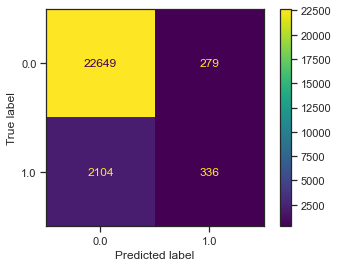

In [628]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

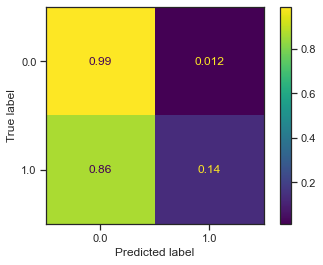

In [629]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [630]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     22928
         1.0       0.55      0.14      0.22      2440

    accuracy                           0.91     25368
   macro avg       0.73      0.56      0.58     25368
weighted avg       0.88      0.91      0.88     25368



In [631]:
X_train.iloc[0]

0      0.0
1      0.0
2      1.0
3     30.0
4      0.0
5      0.0
6      0.0
7      1.0
8      1.0
9      1.0
10     0.0
11     1.0
12     0.0
13     3.0
14     0.0
15     0.0
16     0.0
17     1.0
18     5.0
19     5.0
20     8.0
Name: 94841, dtype: float64

In [632]:
y_train.iloc[0]

0.0

In [633]:
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0.0860081, 0.9139919]])

In [634]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1.])

### Evaluating Curves and AUC

In [635]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

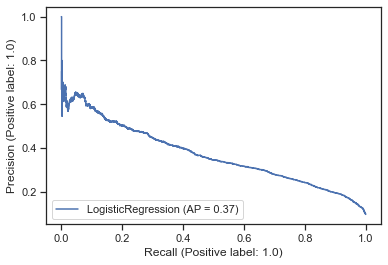

In [636]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

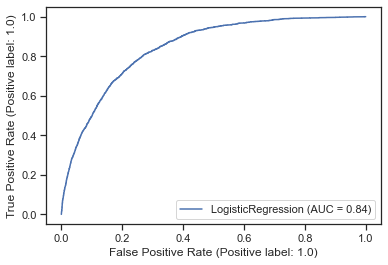

In [637]:
plot_roc_curve(log_model,scaled_X_test,y_test)

## KNN

### Train|Test Split and Scaling Data

In [638]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [639]:
X = df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']

In [640]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [641]:
scaler = StandardScaler()

In [642]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [643]:
from sklearn.neighbors import KNeighborsClassifier

In [644]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [645]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Understanding KNN and Choosing K Value

In [646]:
full_test = pd.concat([X_test,y_test],axis=1)

In [647]:
len(full_test)

76104

### Model Evaluation

In [648]:
y_pred = knn_model.predict(scaled_X_test)

In [649]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [650]:
accuracy_score(y_test,y_pred)

0.860151897403553

In [651]:
confusion_matrix(y_test,y_pred)

array([[63716,  5291],
       [ 5352,  1745]], dtype=int64)

In [652]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     69007
         1.0       0.25      0.25      0.25      7097

    accuracy                           0.86     76104
   macro avg       0.59      0.58      0.58     76104
weighted avg       0.86      0.86      0.86     76104



### Using Elbow Method for Choosing Reasonable K Values

In [653]:
test_error_rates = []

for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    

In [654]:

plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")


Text(0.5, 0, 'K Value')

In [655]:

plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")


Text(0.5, 0, 'K Value')

Choose K to be equal to 6

### Final Model

In [656]:
from sklearn.pipeline import Pipeline

In [657]:
scaler = StandardScaler()
knn6 = KNeighborsClassifier(n_neighbors=6)
operations = [('scaler',scaler),('knn6',knn6)]

In [658]:
pipe = Pipeline(operations)

In [659]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn6', KNeighborsClassifier(n_neighbors=6))])

In [660]:
pipe_pred = pipe.predict(X_test)

In [661]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     69007
         1.0       0.44      0.09      0.15      7097

    accuracy                           0.90     76104
   macro avg       0.67      0.54      0.55     76104
weighted avg       0.87      0.90      0.88     76104



In [662]:
single_sample = X_test.iloc[40]

In [663]:
single_sample

0      0.0
1      0.0
2      1.0
3     28.0
4      1.0
5      0.0
6      0.0
7      0.0
8      1.0
9      1.0
10     0.0
11     1.0
12     0.0
13     5.0
14     0.0
15    30.0
16     1.0
17     1.0
18    12.0
19     5.0
20     5.0
Name: 48851, dtype: float64

In [664]:
pipe.predict(single_sample.values.reshape(1, -1))

array([0.])

In [665]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

array([[0.5, 0.5]])

## SVM

Feature enginnering for SVM

In [666]:
df.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      18.0      15.0       1.0  0.0   9.0        4.0     3.0  
1       0.0       0.0       0.0  0.0   7.0        6.0     1.0  
2      30.0      30.0       1.0  0.0   9.0        4.0     8.0  
3       0.0       0.0       0.0  0.0  11.0        3.0     6.0  
4       3.0       0.0       0.0  0.0  11.0        5.0     4.0  

[5 rows x 22 columns]

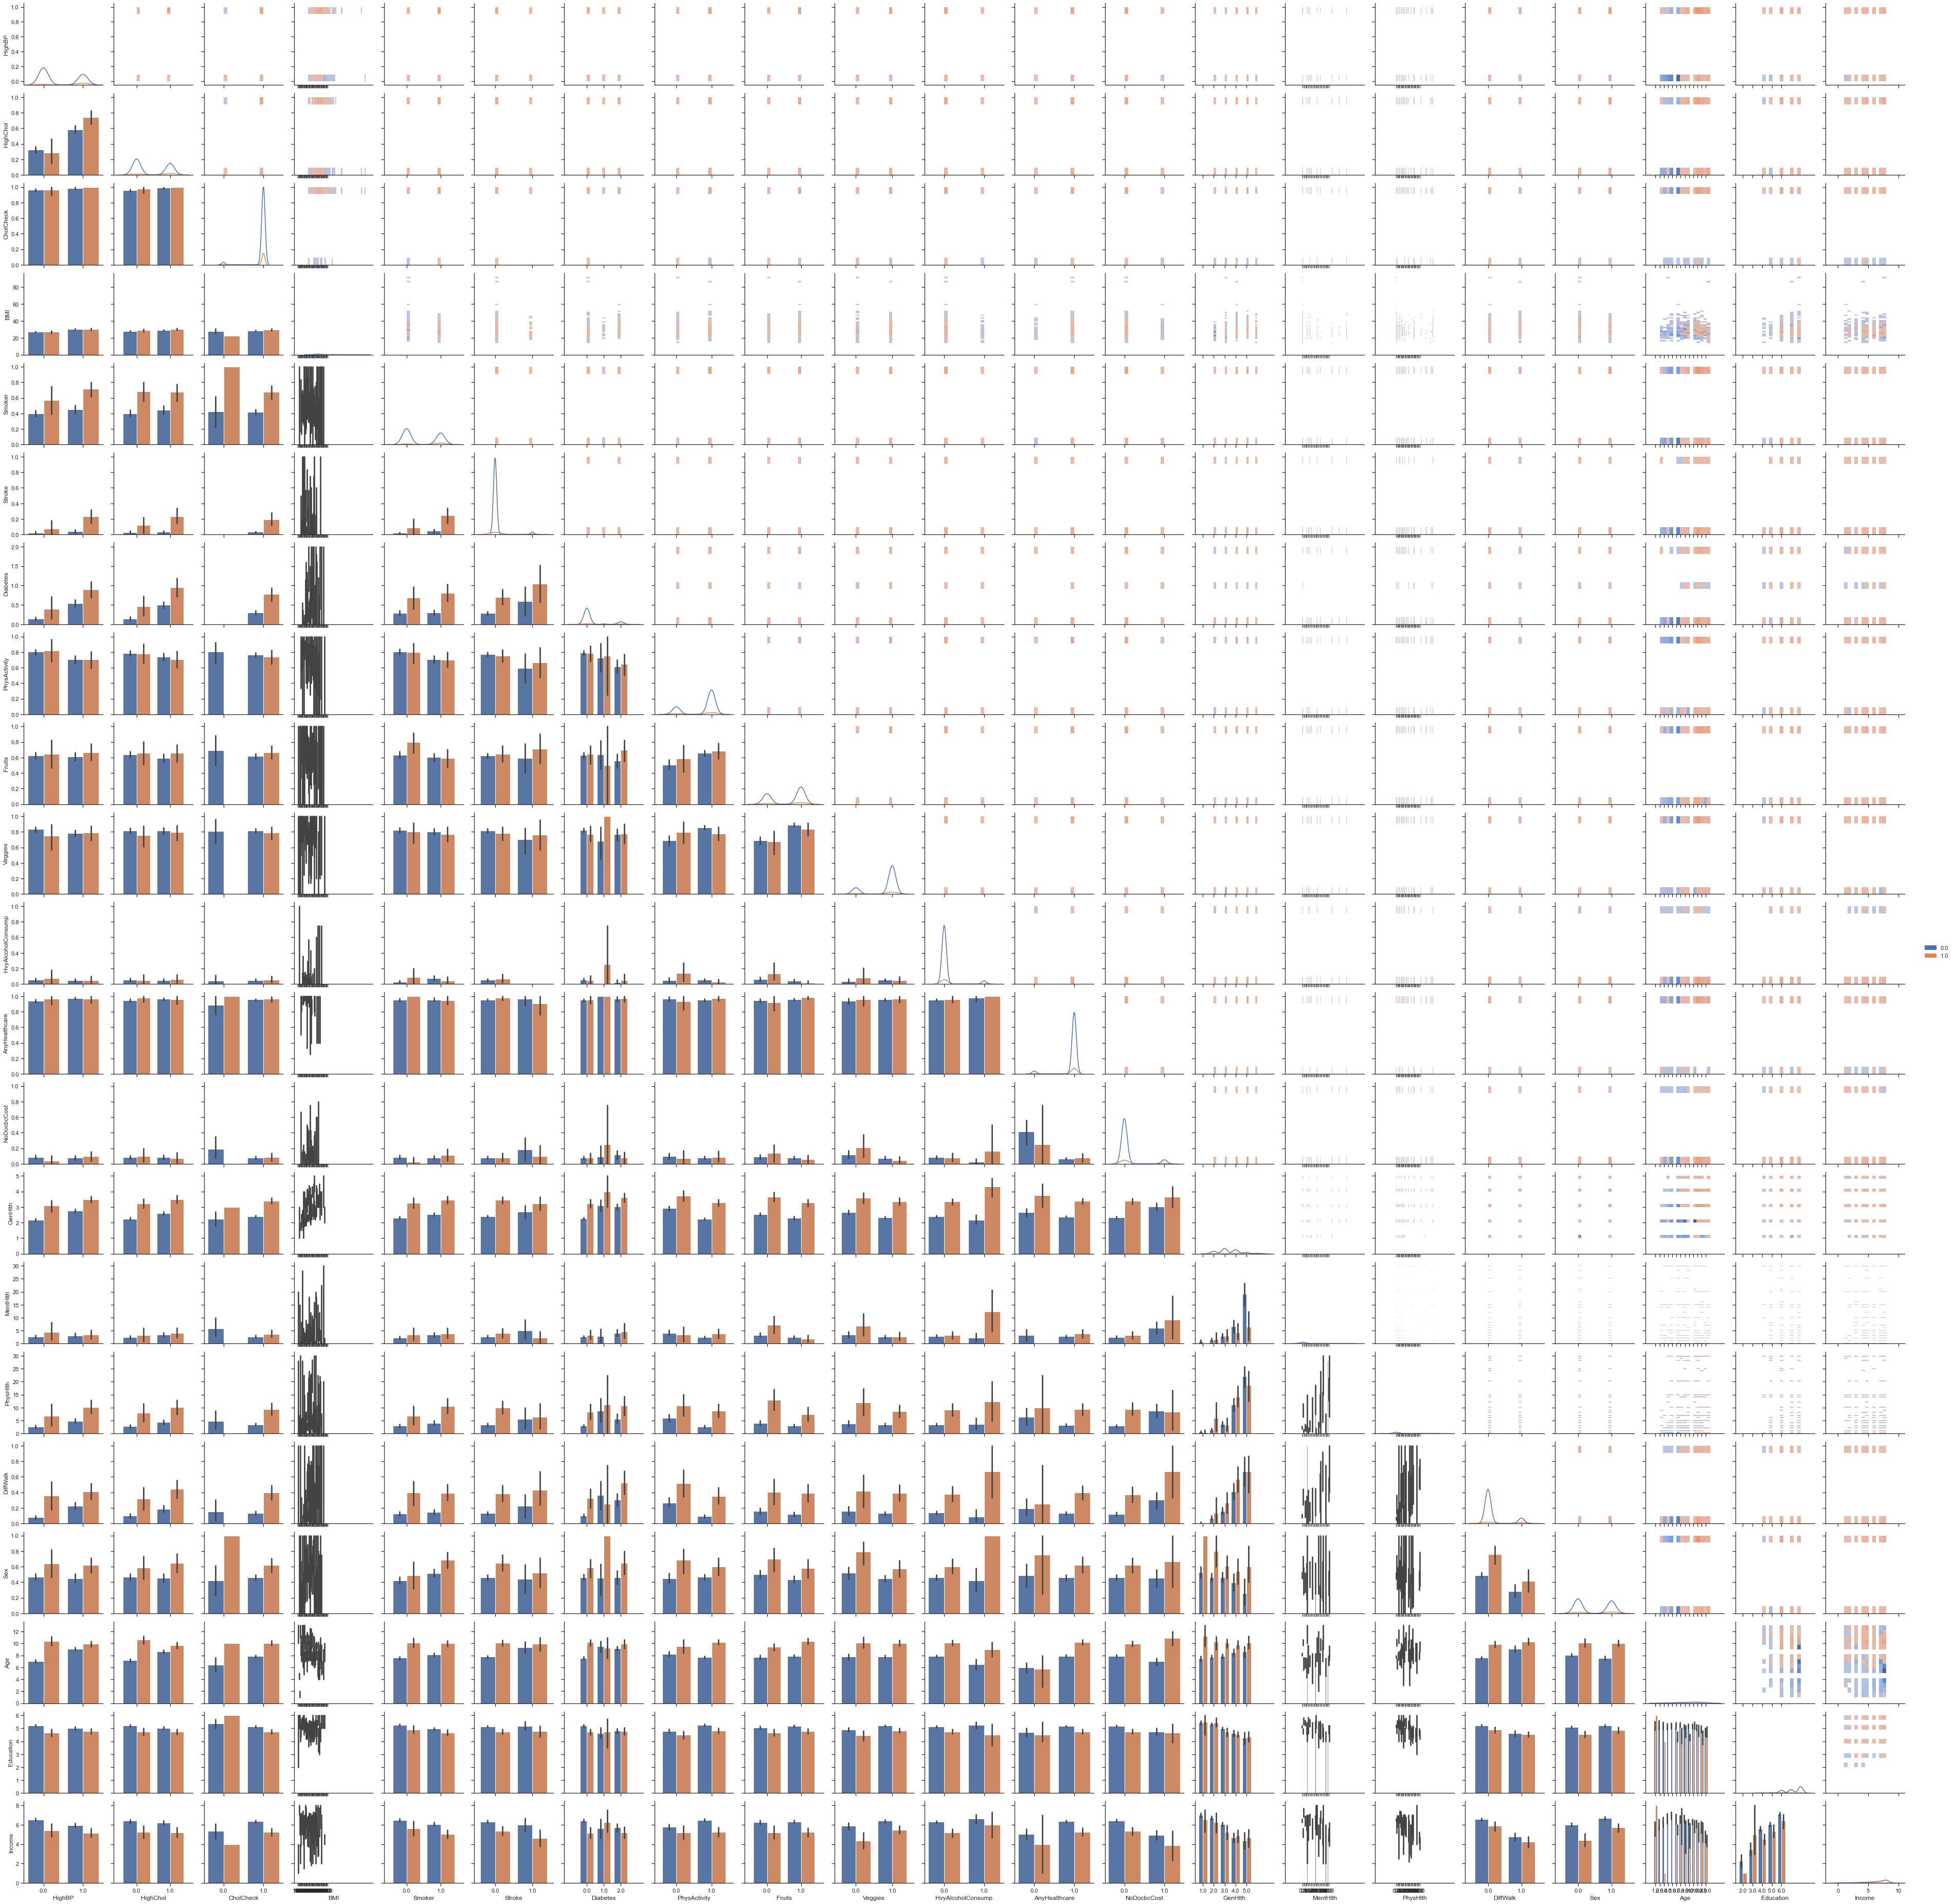

In [667]:
import seaborn as sns
data_for_vis = df.sample(1000)
g = sns.PairGrid(data_for_vis, hue='HeartDiseaseorAttack')
g.map_diag(sns.kdeplot)
g.map_lower(sns.barplot)
g.map_upper(sns.histplot)
g.add_legend(title="", adjust_subtitles=True)

<AxesSubplot:>

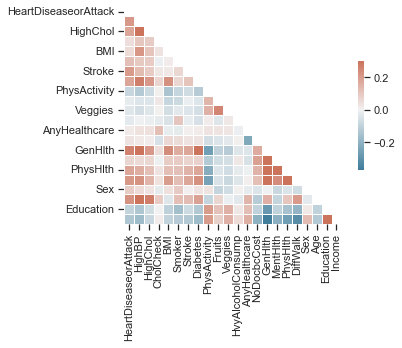

In [668]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [669]:
corr

HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              1.000000  0.209361  0.180765   0.044206   
HighBP                            0.209361  1.000000  0.298199   0.098508   
HighChol                          0.180765  0.298199  1.000000   0.085642   
CholCheck                         0.044206  0.098508  0.085642   1.000000   
BMI                               0.052904  0.213748  0.106722   0.034495   
Smoker                            0.114441  0.096991  0.091299  -0.009929   
Stroke                            0.203002  0.129575  0.092620   0.024158   
Diabetes                          0.180272  0.271596  0.209085   0.067546   
PhysActivity                     -0.087299 -0.125267 -0.078046   0.004190   
Fruits                           -0.019790 -0.040555 -0.040859   0.023849   
Veggies                          -0.039167 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump                -0.028991 -0.003972 -0.011543  -0.023730   
AnyHealthcare                     0.018734  0.038425  0.042230   0.117626   
NoDocbcCost                       0.031000  0.017358  0.013310  -0.058255   
GenHlth                           0.258383  0.300530  0.208426   0.046589   
MentHlth                          0.064621  0.056456  0.062069  -0.008366   
PhysHlth                          0.181698  0.161212  0.121751   0.031775   
DiffWalk                          0.212709  0.223618  0.144672   0.040585   
Sex                               0.086096  0.052207  0.031205  -0.022115   
Age                               0.221618  0.344452  0.272318   0.090321   
Education                        -0.099600 -0.141358 -0.070802   0.001510   
Income                           -0.141011 -0.171235 -0.085459   0.014259   

                           BMI    Smoker    Stroke  Diabetes  PhysActivity  \
HeartDiseaseorAttack  0.052904  0.114441  0.203002  0.180272     -0.087299   
HighBP                0.213748  0.096991  0.129575  0.271596     -0.125267   
HighChol              0.106722  0.091299  0.092620  0.209085     -0.078046   
CholCheck             0.034495 -0.009929  0.024158  0.067546      0.004190   
BMI                   1.000000  0.013804  0.020153  0.224379     -0.147294   
Smoker                0.013804  1.000000  0.061173  0.062914     -0.087401   
Stroke                0.020153  0.061173  1.000000  0.107179     -0.069151   
Diabetes              0.224379  0.062914  0.107179  1.000000     -0.121947   
PhysActivity         -0.147294 -0.087401 -0.069151 -0.121947      1.000000   
Fruits               -0.087518 -0.077666 -0.013389 -0.042192      0.142756   
Veggies              -0.062275 -0.030678 -0.041124 -0.058972      0.153150   
HvyAlcoholConsump    -0.048736  0.101619 -0.016950 -0.057882      0.012392   
AnyHealthcare        -0.018471 -0.023251  0.008776  0.015410      0.035505   
NoDocbcCost           0.058206  0.048946  0.034804  0.035436     -0.061638   
GenHlth               0.239185  0.163143  0.177942  0.302587     -0.266186   
MentHlth              0.085310  0.092196  0.070172  0.073507     -0.125587   
PhysHlth              0.121141  0.116460  0.148944  0.176287     -0.219230   
DiffWalk              0.197078  0.122463  0.176567  0.224239     -0.253174   
Sex                   0.042950  0.093662  0.002978  0.031040      0.032482   
Age                  -0.036618  0.120641  0.126974  0.185026     -0.092511   
Education            -0.103932 -0.161955 -0.076009 -0.130517      0.199658   
Income               -0.100069 -0.123937 -0.128599 -0.171483      0.198539   

                        Fruits  ...  AnyHealthcare  NoDocbcCost   GenHlth  \
HeartDiseaseorAttack -0.019790  ...       0.018734     0.031000  0.258383   
HighBP               -0.040555  ...       0.038425     0.017358  0.300530   
HighChol             -0.040859  ...       0.042230     0.013310  0.208426   
CholCheck             0.023849  ...       0.117626    -0.058255  0.046589   
BMI                  -0.087518  ...      -0.018471     0.058206  0.239

In [670]:
corr['HeartDiseaseorAttack'] 

HeartDiseaseorAttack    1.000000
HighBP                  0.209361
HighChol                0.180765
CholCheck               0.044206
BMI                     0.052904
Smoker                  0.114441
Stroke                  0.203002
Diabetes                0.180272
PhysActivity           -0.087299
Fruits                 -0.019790
Veggies                -0.039167
HvyAlcoholConsump      -0.028991
AnyHealthcare           0.018734
NoDocbcCost             0.031000
GenHlth                 0.258383
MentHlth                0.064621
PhysHlth                0.181698
DiffWalk                0.212709
Sex                     0.086096
Age                     0.221618
Education              -0.099600
Income                 -0.141011
Name: HeartDiseaseorAttack, dtype: float64

In [671]:
abs(corr['HeartDiseaseorAttack'] ) > 0.2

HeartDiseaseorAttack     True
HighBP                   True
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                   True
Diabetes                False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                  True
MentHlth                False
PhysHlth                False
DiffWalk                 True
Sex                     False
Age                      True
Education               False
Income                  False
Name: HeartDiseaseorAttack, dtype: bool

In [672]:
corr[abs(corr['HeartDiseaseorAttack'] ) > 0.2]['HeartDiseaseorAttack']

HeartDiseaseorAttack    1.000000
HighBP                  0.209361
Stroke                  0.203002
GenHlth                 0.258383
DiffWalk                0.212709
Age                     0.221618
Name: HeartDiseaseorAttack, dtype: float64

In [673]:
columns_to_use = corr[abs(corr['HeartDiseaseorAttack'] ) > 0.2]['HeartDiseaseorAttack'].index
columns_to_use

Index(['HeartDiseaseorAttack', 'HighBP', 'Stroke', 'GenHlth', 'DiffWalk',
       'Age'],
      dtype='object')

In [674]:
# NOw only use these columns for SVM
data = df[columns_to_use]

In [675]:
data.head()


HeartDiseaseorAttack  HighBP  Stroke  GenHlth  DiffWalk   Age
0                   0.0     1.0     0.0      5.0       1.0   9.0
1                   0.0     0.0     0.0      3.0       0.0   7.0
2                   0.0     1.0     0.0      5.0       1.0   9.0
3                   0.0     1.0     0.0      2.0       0.0  11.0
4                   0.0     1.0     0.0      2.0       0.0  11.0

In [676]:
data.shape

(253680, 6)

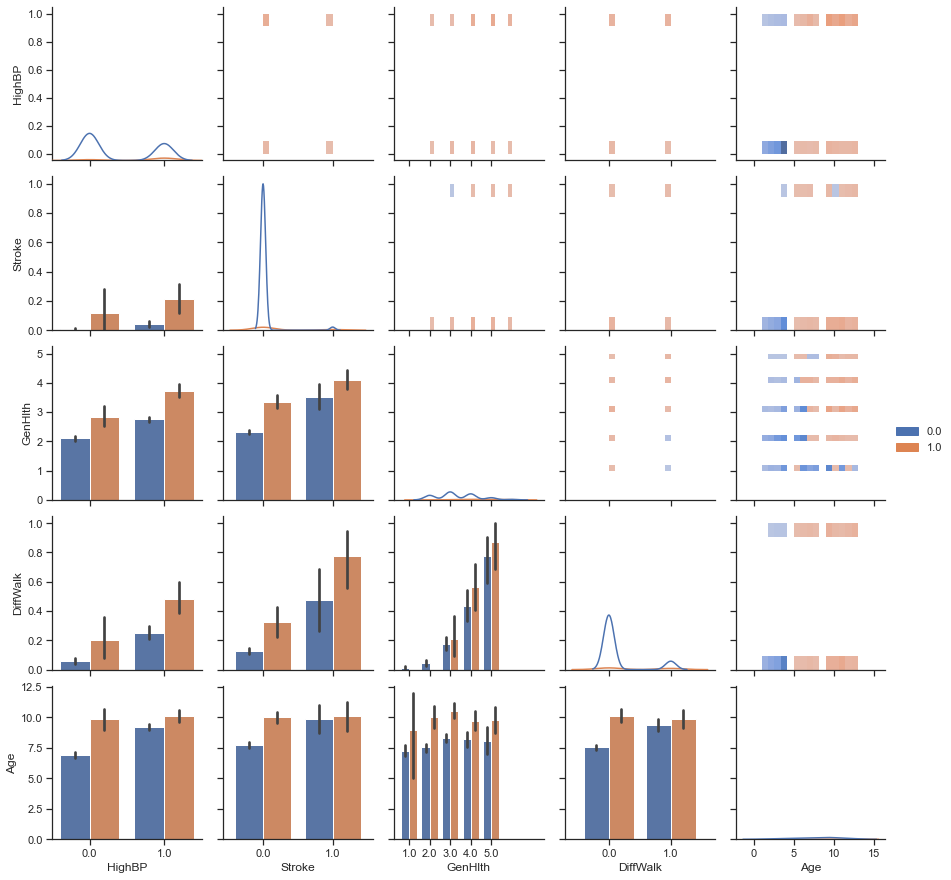

In [677]:
data_for_vis = data.sample(1000)
g = sns.PairGrid(data_for_vis, hue='HeartDiseaseorAttack')
g.map_diag(sns.kdeplot)
g.map_lower(sns.barplot)
g.map_upper(sns.histplot)
g.add_legend(title="", adjust_subtitles=True)


### SVM Model

In [678]:
from sklearn.preprocessing import StandardScaler
def scale(df_train:pd.DataFrame, df_test:pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    # df_train_with_nemeric = df_train.select_dtypes('number')

    # df_test_with_nemeric = df_test.select_dtypes('number')
    # cols = df_train_with_nemeric.columns
    # df_train_rest = df_train.loc[:, ~df_train.columns.isin(cols)]
    # df_test_rest = df_test.loc[:, ~df_test.columns.isin(cols)]
    # scaler = StandardScaler()
    # scaler.fit(df_train_with_nemeric)
    # train = pd.DataFrame(scaler.transform(df_train_with_nemeric.values))
    # test = pd.DataFrame(scaler.transform(df_test_with_nemeric.values))
    # train.columns = cols
    # test.columns = cols
    df = df_train
    scaler = StandardScaler()
    
    numeric_cols = list(df.dtypes[df.dtypes != 'object'].index)
    scaler.fit_transform(df.loc[:,numeric_cols])
    df.loc[:,numeric_cols] = scaler.transform(df.loc[:,numeric_cols])
    df_test.loc[:, numeric_cols] = scaler.transform(df_test.loc[:,numeric_cols])
    return df, df_test

In [679]:
### ! og_test has no predict column
from sklearn.model_selection import train_test_split
label = 'HeartDiseaseorAttack'
y = data[label]
X = data.drop(label, axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# scale the data
X_train, X_test = scale(X_train, X_test)
# feautre engineer

In [680]:
from sklearn.svm import SVC  # Supprt Vector Classifier
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(svm, param_grid)
# Note again we didn't split Train|Test
grid.fit(X_train, y_train)
# 100% accuracy (as expected)
grid.best_score_
print(f'best_score:{grid.best_score_}, params: {grid.best_params_}')

best_score:0.9093936982098276, params: {'C': 1, 'kernel': 'rbf'}


In [681]:
res = pd.DataFrame(grid.cv_results_)
res


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.652305      0.100936         0.084385        0.007630    0.01   
1       3.603553      0.401176         0.075602        0.001020    0.01   
2       6.293593      0.946039         0.127212        0.005335    0.01   
3       1.973094      0.130884         0.083800        0.004706     0.1   
4       7.414148      1.128490         0.073798        0.002316     0.1   
5      11.993486      4.871446         0.124791        0.004872     0.1   
6       2.022277      0.137290         0.090182        0.004533       1   
7      16.270817      2.234544         0.076733        0.002225       1   
8      24.210205     11.435881         0.127284        0.009096       1   

  param_kernel                           params  split0_test_score  \
0       linear  {'C': 0.01, 'kernel': 'linear'}           0.907667   
1          rbf     {'C': 0.01, 'kernel': 'rbf'}           0.907667   
2         poly    {'C': 0.01, 'kernel': 'poly'}           0.910426   
3       linear   {'C': 0.1, 'kernel': 'linear'}           0.907667   
4          rbf      {'C': 0.1, 'kernel': 'rbf'}           0.910426   
5         poly     {'C': 0.1, 'kernel': 'poly'}           0.910426   
6       linear     {'C': 1, 'kernel': 'linear'}           0.907667   
7          rbf        {'C': 1, 'kernel': 'rbf'}           0.910721   
8         poly       {'C': 1, 'kernel': 'poly'}           0.910130   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.907756           0.907657           0.907657           0.907657   
1           0.907756           0.907657           0.907657           0.907657   
2           0.909136           0.907855           0.908840           0.908347   
3           0.907756           0.907657           0.907657           0.907657   
4           0.909924           0.908840           0.907855           0.908643   
5           0.909333           0.907855           0.908150           0.908347   
6           0.907756           0.907657           0.907657           0.907657   
7           0.909530           0.909530           0.908052           0.909136   
8           0.909530           0.907855           0.908150           0.908347   

   mean_test_score  std_test_score  rank_test_score  
0         0.907679        0.000039                6  
1         0.907679        0.000039                6  
2         0.908921        0.000870                3  
3         0.907679        0.000039                6  
4         0.909137        0.000923                2  
5         0.908822        0.000943                4  
6         0.907679        0.000039                6  
7         0.909394        0.000856                1  
8         0.908802        0.000874                5

In [682]:
ans = grid.predict(X_test)


In [683]:
import sklearn
err = sklearn.metrics.mean_squared_error(y_test, ans)
acc = 1 - err
print(err, acc)


0.09328681803847366 0.9067131819615264


In [684]:
print(f'Acheived accuracy: {acc}')

Acheived accuracy: 0.9067131819615264


In [685]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


In [686]:
print(classification_report(y_test,ans))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    183735
         1.0       0.62      0.04      0.07     19209

    accuracy                           0.91    202944
   macro avg       0.76      0.52      0.51    202944
weighted avg       0.88      0.91      0.87    202944



## Dataset 3(Income)

In [687]:
from sklearnex import patch_sklearn

patch_sklearn()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [688]:
data = train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
og_test = test.copy()
og_train = train.copy()
og_test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

### Feature Engineering

In [689]:
train.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country  income_>50K  
0              60  United-States            1  
1              15  United-States            0  
2              40  United-States            1  
3              40  United-States            0  
4              40  United-States            0

In [690]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [691]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB


In [692]:
train.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [693]:
len(train.columns)

15

In [694]:
len(test.columns)

14

In [695]:
100* train.isnull().sum() / len(train)

age                0.000000
workclass          5.682826
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.701026
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.735787
income_>50K        0.000000
dtype: float64

In [696]:
train['workclass'].value_counts()

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64

In [697]:
train.occupation.value_counts()

Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: occupation, dtype: int64

In [698]:
train[train.workclass.isna()]

age workclass  fnlwgt     education  educational-num  \
33      20       NaN  249087  Some-college               10   
48      19       NaN  174233  Some-college               10   
67      66       NaN  117778          11th                7   
82      47       NaN  215620       HS-grad                9   
88      20       NaN  432376  Some-college               10   
...    ...       ...     ...           ...              ...   
43919   19       NaN  171868       HS-grad                9   
43923   63       NaN  186809     Bachelors               13   
43936   17       NaN  154938          11th                7   
43939   57       NaN  153788     Bachelors               13   
43947   36       NaN  103886       HS-grad                9   

           marital-status occupation   relationship   race  gender  \
33          Never-married        NaN      Own-child  White  Female   
48          Never-married        NaN      Own-child  Black    Male   
67     Married-civ-spouse        NaN        Husband  White    Male   
82          Never-married        NaN  Not-in-family  White    Male   
88          Never-married        NaN      Own-child  White    Male   
...                   ...        ...            ...    ...     ...   
43919       Never-married        NaN      Own-child  Black    Male   
43923  Married-civ-spouse        NaN        Husband  White    Male   
43936       Never-married        NaN      Own-child  White    Male   
43939  Married-civ-spouse        NaN           Wife  White  Female   
43947  Married-civ-spouse        NaN        Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country  income_>50K  
33                0             0              40  United-States            0  
48                0             0              24  United-States            0  
67                0             0              40  United-States            0  
82                0             0              12  United-States            0  
88                0             0              40        Germany            0  
...             ...           ...             ...            ...          ...  
43919             0             0              20  United-States            0  
43923             0             0              30  United-States            1  
43936             0             0              20  United-States            0  
43939         99999             0              45  United-States            1  
43947             0             0              15  United-States            0  

[2498 rows x 15 columns]

In [699]:
a=train[train.workclass.isna()].shape[0]
b=train[train.workclass.isna() & train.occupation.isna()].shape[0]
print(f'the ppl wothput a work class {a} also do not have an ocupation. they must be people who do not currently work {b}')

the ppl wothput a work class 2498 also do not have an ocupation. they must be people who do not currently work 2498


In [700]:
train['native-country'].value_counts()

United-States                 39429
Mexico                          880
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
England                         109
South                           105
Dominican-Republic               97
Jamaica                          97
Italy                            94
Japan                            83
Guatemala                        79
Vietnam                          77
Columbia                         75
Poland                           72
Haiti                            71
Portugal                         59
Taiwan                           58
Iran                             52
Nicaragua                        46
Greece                           44
Ecuador                          42
Peru                        

In [701]:
train['capital-gain'].value_counts()
# TODO: Look at capital gain and loss

0        40330
15024      448
7688       370
7298       328
99999      228
         ...  
6612         1
1639         1
7262         1
1111         1
1731         1
Name: capital-gain, Length: 122, dtype: int64

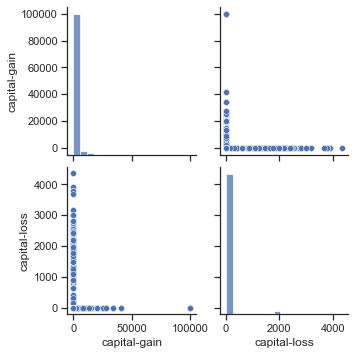

In [702]:
import seaborn as sns
sns.pairplot(train[['capital-gain', 'capital-loss']])

In [703]:
### Preprocessing
def prepocess(df:pd.DataFrame) -> pd.DataFrame:
    df = df[df['native-country'].notna()]
    df.occupation.fillna('undisclosed', inplace=True)
    df.workclass.fillna('undisclosed', inplace=True)
    df = df.drop('education', axis=1) 
    df['capital'] = df['capital-gain'] - df['capital-loss']
    df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

    return df


In [704]:
og_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [705]:
train = prepocess(train)
test = prepocess(test)

d:\Apps\anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [706]:
train.head()

age  workclass  fnlwgt  educational-num      marital-status  \
0   67    Private  366425               16            Divorced   
1   17    Private  244602                8       Never-married   
2   31    Private  174201               13  Married-civ-spouse   
3   58  State-gov  110199                4  Married-civ-spouse   
4   25  State-gov  149248               10       Never-married   

         occupation   relationship   race gender  hours-per-week  \
0   Exec-managerial  Not-in-family  White   Male              60   
1     Other-service      Own-child  White   Male              15   
2   Exec-managerial        Husband  White   Male              40   
3  Transport-moving        Husband  White   Male              40   
4     Other-service  Not-in-family  Black   Male              40   

  native-country  income_>50K  capital  
0  United-States            1    99999  
1  United-States            0        0  
2  United-States            1        0  
3  United-States            0        0  
4  United-States            0        0

In [707]:
test.head()

age         workclass  fnlwgt  educational-num      marital-status  \
0   39  Self-emp-not-inc  327120                9  Married-civ-spouse   
1   32           Private  123253               12  Married-civ-spouse   
2   47           Private  232628                9  Married-civ-spouse   
3   19           Private  374262                8       Never-married   
4   46  Self-emp-not-inc  311231                9  Married-civ-spouse   

          occupation relationship   race gender  hours-per-week  \
0       Craft-repair      Husband  White   Male              40   
1       Craft-repair      Husband  White   Male              42   
2       Craft-repair      Husband  Black   Male              40   
3  Handlers-cleaners    Own-child  White   Male              20   
4    Farming-fishing      Husband  White   Male              40   

  native-country  capital  
0       Portugal        0  
1  United-States        0  
2  United-States        0  
3  United-States        0  
4  United-States        0

In [708]:
train.nunique()

age                   74
workclass              9
fnlwgt             26357
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
hours-per-week        94
native-country        41
income_>50K            2
capital              218
dtype: int64

In [709]:
test.nunique()

age                 61
workclass            6
fnlwgt             878
educational-num     16
marital-status       7
occupation          14
relationship         6
race                 5
gender               2
hours-per-week      62
native-country      29
capital             60
dtype: int64

In [710]:
train.select_dtypes('object').nunique()

workclass          9
marital-status     7
occupation        15
relationship       6
race               5
gender             2
native-country    41
dtype: int64

In [711]:
data['income_>50K'].value_counts()

0    33439
1    10518
Name: income_>50K, dtype: int64

<AxesSubplot:xlabel='income_>50K', ylabel='count'>

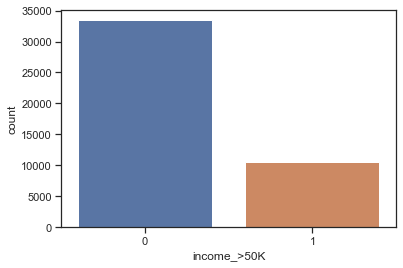

In [712]:
sns.countplot(data=data,x='income_>50K')

In [713]:
sns.pairplot(data,hue='income_>50K')

<AxesSubplot:>

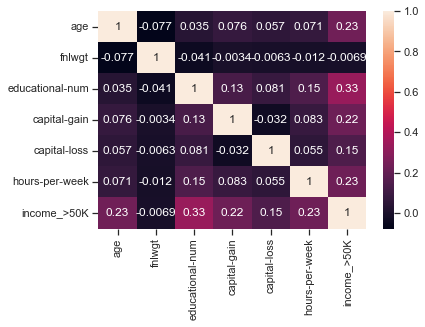

In [714]:
sns.heatmap(data.corr(),annot=True)

In [715]:
from sklearn.preprocessing import StandardScaler

def oneHotEncoding(df, features_to_encode):
    dummies = pd.get_dummies(df[features_to_encode])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res) 
def OneHotEncodingClasses(df):
    object_based_classes = df.select_dtypes('object')
    features_to_encode = []
    for col in object_based_classes.columns:
        column = object_based_classes[col]
        n_unique = column.nunique()
        # print(f'{col=} has {n_unique=}')
        
        if n_unique < 10:
            features_to_encode.append(col)
    print(f'{features_to_encode=}')
    result = oneHotEncoding(df, features_to_encode)
    return result

def LabelEncodingClasses(df):
    object_based_classes = df.select_dtypes('object')
    features_to_encode = []
    for col in object_based_classes.columns:
        column = object_based_classes[col]
        n_unique = column.nunique()
        # print(f'{col=} has {n_unique=}')
        
        if n_unique > 10:
            features_to_encode.append(col)
    print(f'{features_to_encode=}')
    for col in features_to_encode:
        # label encode the rest of the classes
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
    
    return df
    
def feature_enginering(df:pd.DataFrame, train_data:pd.DataFrame = None, y_label = 'income_>50K') -> pd.DataFrame:
    # one hot encode classes with less than 10 uniqe
    df = OneHotEncodingClasses(df)

    # label encode
    df = LabelEncodingClasses(df)
    return df
train2 = train
t = feature_enginering(train2)
t.head()


features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['occupation', 'native-country']


age  fnlwgt  educational-num  occupation  hours-per-week  native-country  \
0   67  366425               16           3              60              38   
1   17  244602                8           7              15              38   
2   31  174201               13           3              40              38   
3   58  110199                4          13              40              38   
4   25  149248               10           7              40              38   

   income_>50K  capital  workclass_Federal-gov  workclass_Local-gov  ...  \
0            1    99999                      0                    0  ...   
1            0        0                      0                    0  ...   
2            1        0                      0                    0  ...   
3            0        0                      0                    0  ...   
4            0        0                      0                    0  ...   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  \
0                       0                       0                  0   
1                       1                       0                  0   
2                       0                       0                  0   
3                       0                       0                  0   
4                       0                       0                  0   

   race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  race_Other  \
0                        0                        0           0           0   
1                        0                        0           0           0   
2                        0                        0           0           0   
3                        0                        0           0           0   
4                        0                        0           1           0   

   race_White  gender_Female  gender_Male  
0           1              0            1  
1           1              0            1  
2           1              0            1  
3           1              0            1  
4           0              0            1  

[5 rows x 37 columns]

### Training


In [716]:
def scale(df_train:pd.DataFrame, df_test:pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    # df_train_with_nemeric = df_train.select_dtypes('number')

    # df_test_with_nemeric = df_test.select_dtypes('number')
    # cols = df_train_with_nemeric.columns
    # df_train_rest = df_train.loc[:, ~df_train.columns.isin(cols)]
    # df_test_rest = df_test.loc[:, ~df_test.columns.isin(cols)]
    # scaler = StandardScaler()
    # scaler.fit(df_train_with_nemeric)
    # train = pd.DataFrame(scaler.transform(df_train_with_nemeric.values))
    # test = pd.DataFrame(scaler.transform(df_test_with_nemeric.values))
    # train.columns = cols
    # test.columns = cols
    df = df_train
    scaler = StandardScaler()
    
    numeric_cols = list(df.dtypes[df.dtypes != 'object'].index)
    scaler.fit_transform(df.loc[:,numeric_cols])
    df.loc[:,numeric_cols] = scaler.transform(df.loc[:,numeric_cols])
    df_test.loc[:, numeric_cols] = scaler.transform(df_test.loc[:,numeric_cols])
    return df, df_test


In [717]:
train = prepocess(og_train)
test = prepocess(og_test)
print(og_test.columns, train.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object') Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income_>50K', 'capital'],
      dtype='object')


d:\Apps\anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [718]:
### ! og_test has no predict column
from sklearn.model_selection import train_test_split
data = prepocess(og_train)
label = 'income_>50K'
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income_>50K', 'capital'],
      dtype='object')


In [719]:
y = data[label]
X = data.drop(label, axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)
X_train.head()

age         workclass  fnlwgt  educational-num      marital-status  \
9078    59  Self-emp-not-inc  114760               10  Married-civ-spouse   
24788   38           Private   33394                9  Married-civ-spouse   
13201   32           Private  121769               10  Married-civ-spouse   
16752   17         Local-gov  192387                5       Never-married   
22821   32           Private  204374               15  Married-civ-spouse   

           occupation relationship   race gender  hours-per-week  \
9078     Craft-repair      Husband  White   Male              20   
24788    Craft-repair      Husband  White   Male              60   
13201    Craft-repair      Husband  White   Male              40   
16752   Other-service    Own-child  White   Male              45   
22821  Prof-specialty      Husband  White   Male              60   

      native-country  capital  
9078   United-States        0  
24788  United-States        0  
13201  United-States        0  
16752  United-States        0  
22821  United-States    -1977

In [720]:
train, test = scale(X_train, X_test)

d:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
d:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [721]:
train.head()

age         workclass    fnlwgt  educational-num  \
9078   1.476002  Self-emp-not-inc -0.705275        -0.019044   
24788 -0.046003           Private -1.471037        -0.409580   
13201 -0.480861           Private -0.639311        -0.019044   
16752 -1.568008         Local-gov  0.025298        -1.971724   
22821 -0.480861           Private  0.138112         1.933637   

           marital-status      occupation relationship   race gender  \
9078   Married-civ-spouse    Craft-repair      Husband  White   Male   
24788  Married-civ-spouse    Craft-repair      Husband  White   Male   
13201  Married-civ-spouse    Craft-repair      Husband  White   Male   
16752       Never-married   Other-service    Own-child  White   Male   
22821  Married-civ-spouse  Prof-specialty      Husband  White   Male   

       hours-per-week native-country   capital  
9078        -1.649288  United-States -0.130954  
24788        1.596277  United-States -0.130954  
13201       -0.026506  United-States -0.130954  
16752        0.379190  United-States -0.130954  
22821        1.596277  United-States -0.397082

In [722]:
test.head()

age         workclass    fnlwgt  educational-num  \
12374 -1.133149           Private -0.124351        -0.019044   
36338  1.548478  Self-emp-not-inc -0.050228        -0.409580   
36634  1.113620           Private -1.057485        -0.409580   
37691 -0.046003           Private -1.476280         1.152564   
22583  0.388856           Private -1.498989         0.762028   

           marital-status       occupation    relationship   race  gender  \
12374       Never-married    Other-service  Other-relative  White  Female   
36338  Married-civ-spouse            Sales            Wife  White  Female   
36634  Married-civ-spouse            Sales         Husband  White    Male   
37691            Divorced   Prof-specialty       Unmarried  White  Female   
22583            Divorced  Exec-managerial   Not-in-family  White  Female   

       hours-per-week native-country   capital  
12374       -1.243593  United-States -0.130954  
36338       -1.243593  United-States -0.130954  
36634       -0.026506  United-States -0.130954  
37691        1.271721  United-States -0.130954  
22583       -0.026506  United-States -0.397485

In [723]:
train = feature_enginering(train)
test = feature_enginering(og_test)
train.head()


features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['occupation', 'native-country']
features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['education', 'occupation', 'native-country']


age    fnlwgt  educational-num  occupation  hours-per-week  \
9078   1.476002 -0.705275        -0.019044           2       -1.649288   
24788 -0.046003 -1.471037        -0.409580           2        1.596277   
13201 -0.480861 -0.639311        -0.019044           2       -0.026506   
16752 -1.568008  0.025298        -1.971724           7        0.379190   
22821 -0.480861  0.138112         1.933637           9        1.596277   

       native-country   capital  workclass_Federal-gov  workclass_Local-gov  \
9078               37 -0.130954                      0                    0   
24788              37 -0.130954                      0                    0   
13201              37 -0.130954                      0                    0   
16752              37 -0.130954                      0                    1   
22821              37 -0.397082                      0                    0   

       workclass_Never-worked  ...  relationship_Own-child  \
9078                        0  ...                       0   
24788                       0  ...                       0   
13201                       0  ...                       0   
16752                       0  ...                       1   
22821                       0  ...                       0   

       relationship_Unmarried  relationship_Wife  race_Amer-Indian-Eskimo  \
9078                        0                  0                        0   
24788                       0                  0                        0   
13201                       0                  0                        0   
16752                       0                  0                        0   
22821                       0                  0                        0   

       race_Asian-Pac-Islander  race_Black  race_Other  race_White  \
9078                         0           0           0           1   
24788                        0           0           0           1   
13201                        0           0           0           1   
16752                        0           0           0           1   
22821                        0           0           0           1   

       gender_Female  gender_Male  
9078               0            1  
24788              0            1  
13201              0            1  
16752              0            1  
22821              0            1  

[5 rows x 36 columns]

In [724]:
train.columns

Index(['age', 'fnlwgt', 'educational-num', 'occupation', 'hours-per-week',
       'native-country', 'capital', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'workclass_undisclosed',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'gender_Female', 'gender_Male'],
      dtype='object')

### Linear Regression Model

In [725]:
from sklearn.model_selection import train_test_split
data = prepocess(og_train)
label = 'income_>50K'
y = data[label]
X = data.drop(label, axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# scale the data
X_train, X_test = scale(X_train, X_test)
# feautre engineer
X_train = feature_enginering(X_train)
X_test = feature_enginering(X_test)


features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['occupation', 'native-country']
features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['occupation', 'native-country']


d:\Apps\anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
d:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
d:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [726]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()


In [727]:
log_model.fit(X_train,y_train)

d:\Apps\anaconda\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:432: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [728]:
log_model.coef_

array([[ 0.38311381,  0.07521516,  0.9570488 , -0.00360141,  0.37706292,
         0.00879528,  1.88789573,  0.45080385, -0.13632588, -0.00384131,
        -0.09724479,  0.36702966, -0.7100477 , -0.24907759, -0.03620515,
        -0.83556835, -0.47143097,  0.06287356,  1.04620985, -0.16568045,
        -0.99042137, -0.37952536, -0.35250253, -0.01338569, -0.11347007,
        -0.54112165, -1.11444008, -0.63836906,  1.17030929, -0.2313407 ,
        -0.2842511 , -0.50122323, -0.12315499, -0.11050724, -0.96272921,
        -0.28774805]])

In [729]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
y_pred = log_model.predict(X_test)

In [730]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6551
           1       0.70      0.54      0.61      2088

    accuracy                           0.83      8639
   macro avg       0.78      0.74      0.75      8639
weighted avg       0.83      0.83      0.83      8639



### Evaluating Curves and AUC


In [731]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

In [732]:
plot_precision_recall_curve(log_model,X_test,y_test)

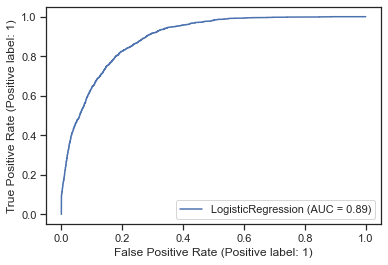

In [733]:
plot_roc_curve(log_model,X_test,y_test)

## KNN

In [734]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)

In [735]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [736]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [737]:
confusion_matrix(y_test,y_pred)

array([[6073,  478],
       [ 953, 1135]], dtype=int64)

In [738]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6551
           1       0.70      0.54      0.61      2088

    accuracy                           0.83      8639
   macro avg       0.78      0.74      0.75      8639
weighted avg       0.83      0.83      0.83      8639



### Using Elbow Method for Choosing Reasonable K Values

In [739]:
test_error_rates = []


for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred_test = knn_model.predict(X_test)

    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)


Text(0.5, 0, 'K Value')

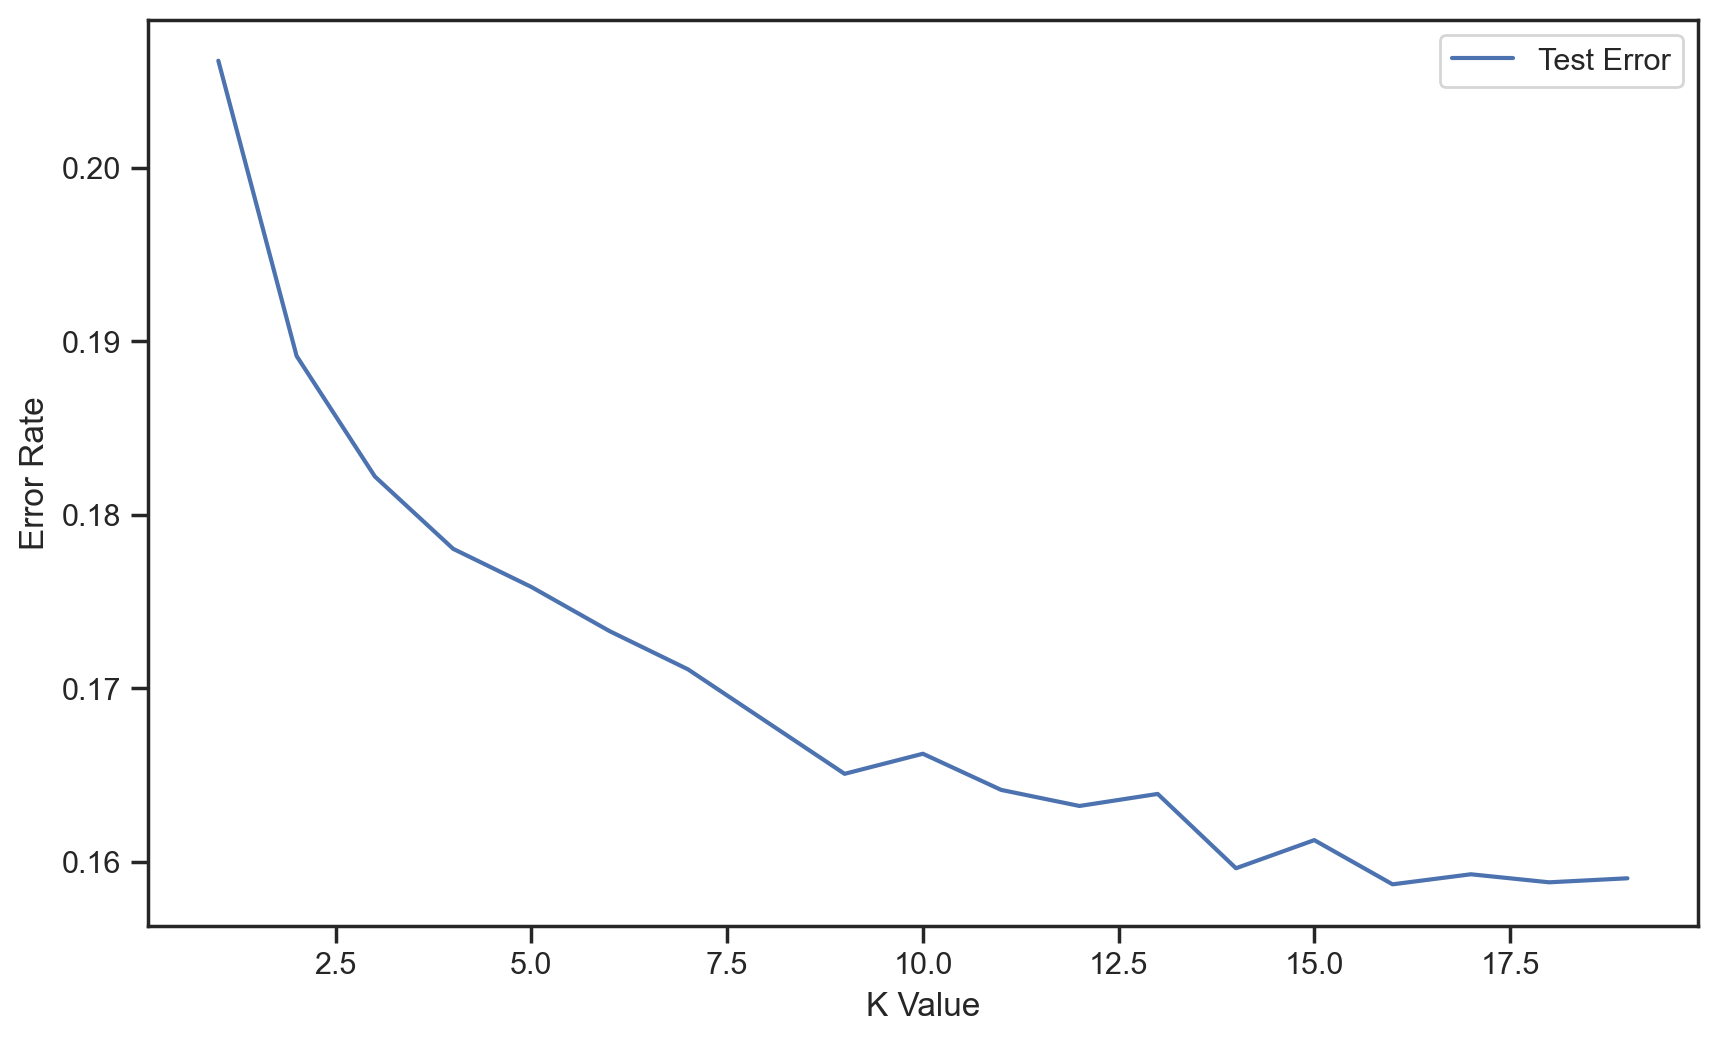

In [740]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

Choosen K value = 15

In [741]:
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
knn15 = KNeighborsClassifier(n_neighbors=15)
operations = [('scaler',scaler),('knn15',knn15)]
pipe = Pipeline(operations)


In [742]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn15', KNeighborsClassifier(n_neighbors=15))])

In [743]:
pipe_pred = pipe.predict(X_test)

In [744]:
print(classification_report(y_test, pipe_pred))


              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6551
           1       0.69      0.56      0.62      2088

    accuracy                           0.83      8639
   macro avg       0.78      0.74      0.76      8639
weighted avg       0.83      0.83      0.83      8639



## SVM

In [745]:
### ! og_test has no predict column
from sklearn.model_selection import train_test_split
data = prepocess(og_train)
label = 'income_>50K'
y = data[label]
X = data.drop(label, axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# scale the data
X_train, X_test = scale(X_train, X_test)
# feautre engineer
X_train = feature_enginering(X_train)
X_test = feature_enginering(X_test)

features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']


d:\Apps\anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
d:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
d:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

features_to_encode=['occupation', 'native-country']
features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['occupation', 'native-country']


In [746]:
import numpy as np
import pandas as pd
import seaborn as sns
sb = sns
import matplotlib.pyplot as plt
sb.set_theme(style='ticks')

In [747]:
from sklearn.svm import SVC  # Supprt Vector Classifier
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(svm, param_grid)
# Note again we didn't split Train|Test
grid.fit(X_train, y_train)
# 100% accuracy (as expected)
grid.best_score_
print(f'best_score:{grid.best_score_}, params: {grid.best_params_}')


best_score:0.8412743111831442, params: {'C': 1, 'kernel': 'linear'}


In [748]:
res = pd.DataFrame(grid.cv_results_)
res

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.150167      0.104260         0.063488        0.009673    0.01   
1       0.565083      0.080200         0.054844        0.005029    0.01   
2       0.901638      0.310392         0.092061        0.006085    0.01   
3       1.355189      0.117115         0.053742        0.005199     0.1   
4       1.032631      0.071274         0.064383        0.006076     0.1   
5       1.238057      0.073431         0.093511        0.003191     0.1   
6       3.683907      0.252454         0.056972        0.003763       1   
7       1.054007      0.086072         0.061461        0.001330       1   
8       1.130582      0.081499         0.079486        0.007157       1   

  param_kernel                           params  split0_test_score  \
0       linear  {'C': 0.01, 'kernel': 'linear'}           0.838194   
1          rbf     {'C': 0.01, 'kernel': 'rbf'}           0.679167   
2         poly    {'C': 0.01, 'kernel': 'poly'}           0.617824   
3       linear   {'C': 0.1, 'kernel': 'linear'}           0.838426   
4          rbf      {'C': 0.1, 'kernel': 'rbf'}           0.762500   
5         poly     {'C': 0.1, 'kernel': 'poly'}           0.765972   
6       linear     {'C': 1, 'kernel': 'linear'}           0.839583   
7          rbf        {'C': 1, 'kernel': 'rbf'}           0.825000   
8         poly       {'C': 1, 'kernel': 'poly'}           0.832176   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.840741           0.838157           0.835379           0.847650   
1           0.645139           0.797638           0.649687           0.618893   
2           0.758333           0.625376           0.774022           0.758277   
3           0.840509           0.840472           0.835610           0.846955   
4           0.762500           0.764760           0.763834           0.762677   
5           0.765046           0.769160           0.766844           0.765223   
6           0.841667           0.841630           0.836073           0.847418   
7           0.824306           0.824728           0.830285           0.837925   
8           0.830324           0.827043           0.828201           0.838389   

   mean_test_score  std_test_score  rank_test_score  
0         0.840024        0.004173                3  
1         0.678105        0.062753                9  
2         0.706767        0.069815                8  
3         0.840395        0.003737                2  
4         0.763254        0.000903                7  
5         0.766449        0.001497                6  
6         0.841274        0.003686                1  
7         0.828449        0.005217                5  
8         0.831227        0.003992                4

In [749]:
grid.scorer_

<function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>

In [750]:
ans = grid.predict(X_test)

In [751]:
import sklearn
err = sklearn.metrics.mean_squared_error(y_test, ans)
acc = 1- err
print(err, acc)

0.15747557531138584 0.8425244246886141


In [752]:
print(f'Acheived accuracy: {acc}')

Acheived accuracy: 0.8425244246886141


# Report

## Dataset 1


### liner regression: 85.5 acc

### knn: 94 with k =9
### svm: liner: 93.5

BEST: KNN with k=9
Data is well clustered but not lineraly seperable

# dataset heart diseases
### liner reg: 90
### knn: 90: k =6
### SVM: 91: non liner

SVM with non-liner kernel
Data is not linerlay seperable and not well clustered. Also there seems to be a few outliers

# Dataset 3 Income
### liner 84
### knn: 84 k=15
### svm: liner, 84

